# Contents

* Introduction

* Stage 1 : Data overview
    * 1.1 Goal
    * 1.2 Stages

* Stage 2 : Data Preprocessing
    * 2.1 Import Library
    * 2.2 Load Data
    * 2.2.1 Data Hypothesis
    * 2.2.2 Data Orders
    * 2.2.3 Data Visits

* Stage 3 : Data Cleansing

* Stage 4 : Analisis A/B Testing
    * 4.1  Gambarkan pendapatan kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.
    * 4.2 Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.
    * 4.3 Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.
    * 4.4 Gambarkan konversi kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.
    * 4.5 Gambarkan perbedaan relatif untuk tingkat konversi kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.
    * 4.6 Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buat kesimpulan dan asumsinya.
    * 4.7 Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buat kesimpulan dan asumsinya.
    * 4.8 Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.
    * 4.9 Buat diagram tebar (scatter chart) untuk harga pesanan. Buat kesimpulan dan asumsinya.
    * 4.10 Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.
    * 4.11 Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.
    * 4.12 Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.
    * 4.13 Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.
    * 4.14 Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

* Stage 5 : Kesimpulan Umum


#  Introduction

Setiap kali kita melakukan penelitian, kita membutuhkan formula hipotesis yang akan kita uji. Terkadang kita bisa menerima hipotesis tersebut, dan juga kita dapat menolaknya. Pebisnis harus paham untuk membuat asumsi yang tepat.

Dalam projek kali ini, bersama tim pemasaran kami telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. Tugas kami adalah memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya.  

Tersedia beberapa dataset yang berisi hipotesis singkat, data pesanan dan data kunjungan. Dari ketiga dataset tersebut kami akan melakukan analisis untuk memproritaskan hipotesis-hipotesis tersebut.

## Data Overview

Kamu adalah seorang data analyst di sebuah toko online besar. Kamu bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan.

Nah, tugasmu adalah memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya. 



### Goal

Tujuan Utama dalam Analisis Data ini adalah :

   1. Memprioritaskan hipotesis yang telah dibuat, menjalankan A/B testing, dan menganalisis hasilnya. 
    
### Stages

Data yang berasal dari departemen periklanan disimpan dalam beberapa file :
   * '/datasets/hypotheses_us.csv'
   * '/datasets/orders_us.csv'
   * '/datasets/visits_us.csv'

Tidak terdapat informasi tentang kualitas data, sehingga kita harus eksplor data tersebut sebelum melakukan hipotesis.

Pertama, kita akan mengevaluasi kualitas data dan melihat apakah ada masalah yang signifikan. Kemudian, selama data preprocessing, kita akan menghitung masalah kritis.

Dalam projek ini terdiri dari empat tahapan : 

    1. Data overview
    2. Data preprocessing
    3. Exploratory Data Analysis (EDA)
    4. Analisis Data Statistik

## Data Preprocessing 

### Import Library

In [1]:
# Import Library Data Processing
import pandas as pd, numpy as np
import datetime
import scipy.stats as stats
# Import Library Data Visualization
import matplotlib.pyplot as plt, seaborn as sns
# Import library Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

### Load Data

#### Data Hypothesis

* Hypotheses — deskripsi singkat tentang hipotesis
* Reach — jangkauan pengguna, dalam skala satu hingga sepuluh
* Impact — dampak terhadap pengguna, dalam skala satu hingga sepuluh
* Confidence — keyakinan pada hipotesis, dalam skala satu sampai sepuluh
* Effort — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.

In [2]:
# load data hypothesis
df_hypotesis = pd.read_csv(r'/datasets/hypotheses_us.csv', delimiter=';')
df_hypotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
# cek info pada df_hypotesis
df_hypotesis.info()
print('\nmissing value: \n', df_hypotesis.isnull().sum())
print('\nDuplikasi    :', df_hypotesis.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

missing value: 
 Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

Duplikasi    : 0


#### Data Orders

* transactionId — ID pesanan
* visitorId — ID pengguna yang membuat pesanan
* date — tanggal dibuatnya pesanan
* revenue — pendapatan dari pesanan
* group — kelompok uji (test group) A/B tempat pengguna berada

In [4]:
df_orders = pd.read_csv(r'/datasets/orders_us.csv')
df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [5]:
# cek info pada df_orders
df_orders.info()
print('\nmissing value: \n', df_orders.isnull().sum())
print('\nDuplikasi    :', df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

missing value: 
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Duplikasi    : 0


#### Data Visits

* date — tanggal
* group — kelompok uji (test group) A/B
* visitors — jumlah pengunjung pada tanggal yang ditentukan dalam kelompok uji A/B yang ditentukan
* visits — jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

In [6]:
df_visits = pd.read_csv(r'/datasets/visits_us.csv')
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
# cek info pada df_orders
df_visits.info()
print('\nmissing value: \n', df_visits.isnull().sum())
print('\nDuplikasi    :', df_visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

missing value: 
 date      0
group     0
visits    0
dtype: int64

Duplikasi    : 0


**Kesimpulan Sementara**

1. Tidak terdapat missing value dan duplikasi pada ketiga dataset
2. Terdapat tipe data yang tidak sesuai pada kolom date di df_orders dan df_visits
3. Beberapa Kolom masih memiliki penulisan yang berbeda, lebih baik di seragamkan penulisan nama kolom

### Data Cleansing

In [8]:
# Seragamkan penulisan nama kolom
df_hypotesis.columns = df_hypotesis.columns.str.lower()
df_hypotesis.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [9]:
# rubah tipe data kolom date ke datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])

In [10]:
# Seragamkan penulisan nama kolom ke Snake_Case
df_orders = df_orders.rename(columns={
    'transactionId': 'transaction_id',
    'visitorId': 'visitor_id'
})
# cek data
df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
# cek data
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


* Semua kolom sudah memiliki tipe data yang sesuai
* Semua kolom telah diseragamkan penulisan nama kolom

## Data Preparation

* Menerapkan framework ICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
* Menerapkan framework RICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.
* Menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE. Berikan penjelasan terkait perubahan tersebut.

In [12]:
# cek data
df_hypotesis.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [13]:
# buat kolom ICE
df_hypotesis['ICE'] = (df_hypotesis['impact'] * df_hypotesis['confidence']) / df_hypotesis['effort']

# buat kolom RICE
df_hypotesis['RICE'] = (df_hypotesis['reach'] *df_hypotesis['impact'] * \
                        df_hypotesis['confidence']) / df_hypotesis['effort']

# cek datanya
df_hypotesis

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [14]:
# sorting ICE secara DESC
df_hypotesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [15]:
# cek hypotesis ke 8
df_hypotesis['hypothesis'][8]

'Launch a promotion that gives users discounts on their birthdays'

In [16]:
# sorting RICE secara DESC
df_hypotesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [17]:
# cek hypotesis ke 7
df_hypotesis['hypothesis'][7]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

**Kesimpulan Sementara**
* findings :
1. Terdapat perbedaan jika hipotesis di kelompokkan berdasarkan ICE dan RICE
2. Jika hypotesis di kelompokkan berdasarkan ICE maka hypotesis 8 yang harus di prioritaskan2. 
3. Jika hypotesis di kelompokkan berdasarkan RICE maka hypotesis 7 yang harus di prioritaskan
4. 4 hypotesis teratas baik dari ICE maupun RICE lebih di prioritaskan daripada hipoteses lainnya

## Analisis A/B Testing

In [18]:
# cek datanya
df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [19]:
#kelompokkan data pesanan
df_orders_agg = df_orders.groupby(['date', 'group']).agg({
    'revenue': 'sum',
    'transaction_id': 'nunique',
    'visitor_id': 'nunique'
}).reset_index()

# cek data nya
df_orders_agg

,date,group,revenue,transaction_id,visitor_id
0,2019-08-01,A,2356.8,24,20
1,2019-08-01,B,1620.0,21,20
2,2019-08-02,A,1503.5,20,19
3,2019-08-02,B,2623.8,24,23
4,2019-08-03,A,1815.2,24,24
...,...,...,...,...,...
57,2019-08-29,B,3623.7,20,20
58,2019-08-30,A,1364.3,11,10
59,2019-08-30,B,3393.3,24,24
60,2019-08-31,A,991.4,12,12


In [20]:
# cek data kunjungan
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [21]:
# gabungkan data
df_merge = pd.merge(df_orders_agg, df_visits)

# pisahkan data berdasarkan grup
df_merge_group_a = df_merge[df_merge['group']=='A']
df_merge_group_b = df_merge[df_merge['group']=='B']

# cek data nya 
df_merge_group_a.head()

,date,group,revenue,transaction_id,visitor_id,visits
0,2019-08-01,A,2356.8,24,20,719
2,2019-08-02,A,1503.5,20,19,619
4,2019-08-03,A,1815.2,24,24,507
6,2019-08-04,A,1146.6,16,15,717
8,2019-08-05,A,1988.1,25,25,756


In [22]:
# total semua kumulatif dari masing-masing kolom
for _df in [df_merge_group_a, df_merge_group_b]:
    _df['revenue_cumsum'] = _df['revenue'].cumsum()
    _df['transaction_id_cumsum'] = _df['transaction_id'].cumsum()
    _df['visitor_id_cumsum'] = _df['visitor_id'].cumsum()
    _df['visits_cumsum'] = _df['visits'].cumsum()

In [23]:
# buat cumulatif data berdasarkan kelompok dan urutkan berdasarkan waktu
df_cumulative = pd.concat([df_merge_group_a, df_merge_group_b]).sort_values(by='date')

# cek datanya
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845


In [97]:
# cek data kumulatif berdasarkan grup A
df_cumulative[df_cumulative['group']=='A'].head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cumsum,conversion_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000,3.337969
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091,3.288490
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235,3.685637
6,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,81.215476,3.278689
8,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,80.827523,3.285112


In [98]:
# cek data kumulatif berdasarkan grup B
df_cumulative[df_cumulative['group']=='B'].head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cumsum,conversion_cumsum
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857,2.945302
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667,3.477589
5,2019-08-03,B,1806.8,16,16,509,6050.6,61,59,1803,99.190164,3.383250
7,2019-08-04,B,1717.3,17,16,770,7767.9,78,75,2573,99.588462,3.031481
9,2019-08-05,B,1495.0,23,23,707,9262.9,101,98,3280,91.711881,3.079268


### Gambarkan pendapatan kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

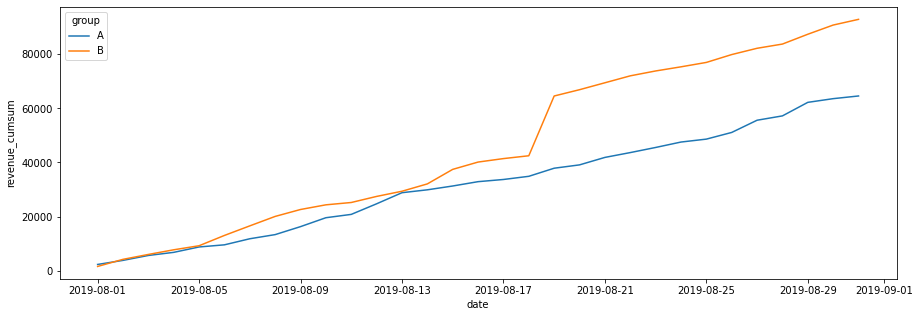

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_cumulative, x='date', y='revenue_cumsum', hue='group');

* findings : 
    1. Pendapatan Kedua Grup ternyata terus meningkat setiap harinya selama pengujian.
    2. Hari pertama pengujian, Pendapatan pada Grup A lebih unggul dari grup B.
    3. Pendapatan pada grup B terus meningkat lebih unggul melebih pendapatan pada Grup A selama pengujian.

### Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

In [26]:
# cek datanya
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845


In [27]:
# buat kolom pesanan kumulatif
df_cumulative['order_size_cumsum'] = df_cumulative['revenue_cumsum'] / df_cumulative['transaction_id_cumsum']

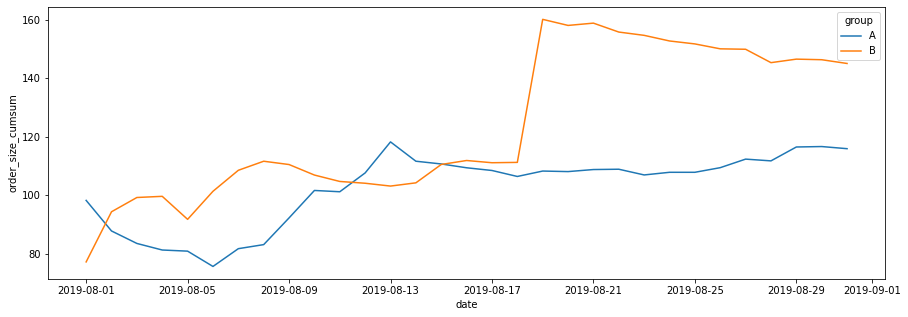

In [28]:
# buat grafiknya
plt.figure(figsize=(15,5))
sns.lineplot(data=df_cumulative, x='date', y='order_size_cumsum', hue='group');

* findings :
    1. Pesanan rata-rata kumulatif kelompok B lebih tinggi dan unggul daripada kelompok A
    2. Pesanan rata-rata kumulatif kelompok A pada awalnya menurun di awal pengujian, meningkat di tengah-tengah pengujian, dan stabil menjelang akhir pengujian.
    3. Pesanan rata-rata kumulatif kelompok B pada awalnya bernilai rendah di awal pengujian, meningkat cukup pesat di tengah-tengah pengujian, dan menurun menjelang akhir pengujian.

### Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.

In [29]:
# cek datanya
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235


In [30]:
# pisahkan dulu data kumulatif grup A dan B
df_cumulative_a = df_cumulative[df_cumulative['group']=='A'].reset_index(drop=True)
df_cumulative_b = df_cumulative[df_cumulative['group']=='B'].reset_index(drop=True)

In [31]:
# gabungkan tabelnya
merge_df = df_cumulative_a.merge(df_cumulative_b,
                                 left_on='date',
                                 right_on='date',
                                 how='left',
                                 suffixes=['A', 'B'])
# cek datanya
merge_df.head()

,date,groupA,revenueA,transaction_idA,visitor_idA,visitsA,revenue_cumsumA,transaction_id_cumsumA,visitor_id_cumsumA,visits_cumsumA,order_size_cumsumA,groupB,revenueB,transaction_idB,visitor_idB,visitsB,revenue_cumsumB,transaction_id_cumsumB,visitor_id_cumsumB,visits_cumsumB,order_size_cumsumB
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
1,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
2,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235,B,1806.8,16,16,509,6050.6,61,59,1803,99.190164
3,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,81.215476,B,1717.3,17,16,770,7767.9,78,75,2573,99.588462
4,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,80.827523,B,1495.0,23,23,707,9262.9,101,98,3280,91.711881


In [32]:
# buat kolom relative order
merge_df['relative_order_sizeB'] = merge_df['order_size_cumsumB'] / merge_df['order_size_cumsumA'] - 1
merge_df['relative_order_sizeA'] = merge_df['order_size_cumsumB'] / merge_df['order_size_cumsumA']

In [33]:
# ketika positif order size B > order size A
95 / 80 - 1

0.1875

In [34]:
# ketika negatif order size B < order size A
75 / 80 - 1

-0.0625

In [35]:
# ketika negatif order size B < order size A
80 / 80 - 1

0.0

In [36]:
merge_df[['order_size_cumsumB','order_size_cumsumA', 'relative_order_sizeB']].head()

,order_size_cumsumB,order_size_cumsumA,relative_order_sizeB
0,77.142857,98.200000,-0.214431
1,94.306667,87.734091,0.074915
2,99.190164,83.463235,0.188429
3,99.588462,81.215476,0.226225
4,91.711881,80.827523,0.134662


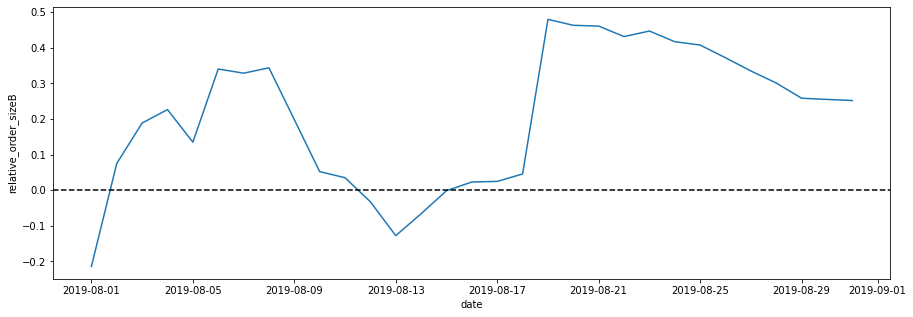

In [37]:
# buat grafik nya
plt.figure(figsize=(15, 5))
sns.lineplot(data=merge_df, x='date', y='relative_order_sizeB');
plt.axhline(y=0, color='black', linestyle='--');

* Findings :
    1. Order size grup B bernilai negatif, artinya order size B lebih kecil daripada order size A
    2. Order size grup B bernilai positif, artinya order size B lebih besar daripada order size A 
    3. Pada awal & tengah pengujian, order size B lebih kecil daripada order size A, akan tetapi selain hal tersebut, order size B selalu lebih besar daripada order size A

### Gambarkan konversi kumulatif berdasarkan kelompok. Buat kesimpulan dan asumsinya.

In [108]:
# Pisahkan data berdasarkan kelompok
group_a = df_cumulative[df_cumulative['group'] == 'A']
group_b = df_cumulative[df_cumulative['group'] == 'B']

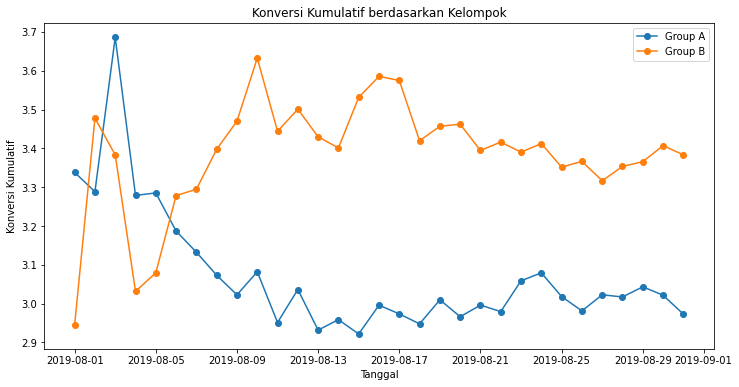

In [109]:
# Gambarkan konversi kumulatif
plt.figure(figsize=(12, 6))
plt.plot(group_a['date'], group_a['conversion_cumsum'], label='Group A', marker='o')
plt.plot(group_b['date'], group_b['conversion_cumsum'], label='Group B', marker='o')
plt.title('Konversi Kumulatif berdasarkan Kelompok')
plt.xlabel('Tanggal')
plt.ylabel('Konversi Kumulatif')
plt.legend()
plt.show()

* findings: 
    1. Konversi kumulatif pada kelompok B lebih tinggi dari kelompok A pada akhir pengujian
    2. Konversi kumulatif pada kedua kelompok selalu mengalami fluktuatif
    3. Konversi kumulatif  pada kelompok A awalnya lebih tinggi pada awal pengujian, akan tetapi lama-lama semakin menurun hingga akhir pengujian

### Gambarkan perbedaan relatif untuk tingkat konversi kumulatif kelompok B yang dibandingkan dengan kelompok A. Buat kesimpulan dan asumsinya.

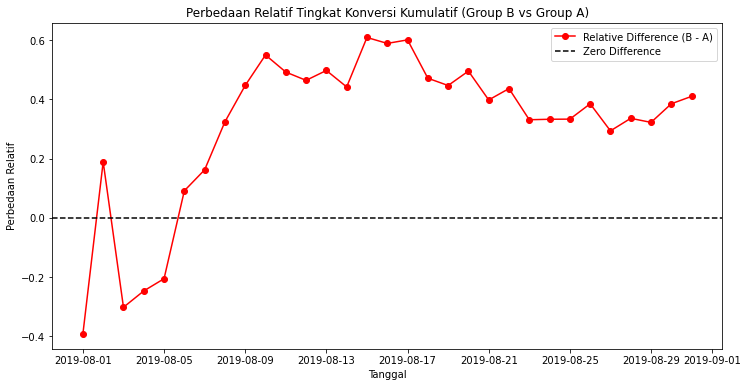

In [110]:
# Gambarkan perbedaan relatif
plt.figure(figsize=(12, 6))
relative_difference = group_b['conversion_cumsum'].reset_index(drop=True) - group_a['conversion_cumsum'].reset_index(drop=True)
plt.plot(group_a['date'], relative_difference, label='Relative Difference (B - A)', marker='o', color='red')
plt.axhline(0, color='black', linestyle='--', label='Zero Difference')
plt.title('Perbedaan Relatif Tingkat Konversi Kumulatif (Group B vs Group A)')
plt.xlabel('Tanggal')
plt.ylabel('Perbedaan Relatif')
plt.legend()
plt.show()

* findings :
    * Tingkat Konversi Kumulatif kelompok B pada awal pengujian lebih rendah dari kelompok B
    * Tingkat Konversi Kumulatif kelompok B semakin tinggi setiap hari dan melebihi kelompok A hingga akhir pengujian

### Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari. Buat grafik tingkat konversi harian dari kedua kelompok dan jelaskan perbedaannya. Buat kesimpulan dan asumsinya.

In [38]:
# konversi
#rasio jumlah pesanan / jumlah kunjungan
100 / 1000 * 100

10.0

In [39]:
# cek data cumulatif
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235


In [40]:
# baut kolom total konversi
df_cumulative['conversion_cumsum'] = df_cumulative['transaction_id_cumsum'] / df_cumulative['visits_cumsum'] * 100

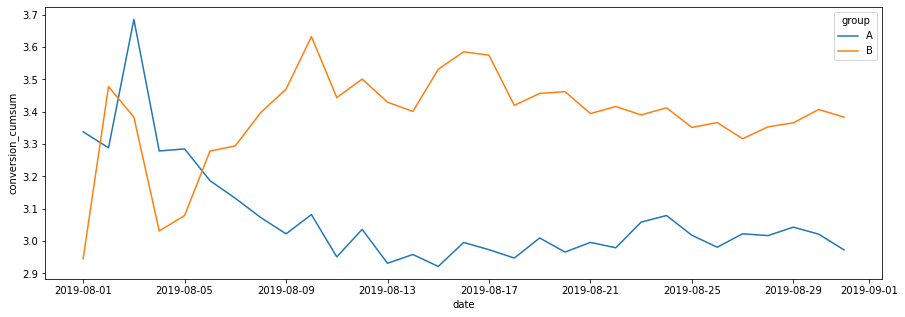

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_cumulative, x='date', y='conversion_cumsum', hue='group');

* findings: 
    1. Tingkat konversi harian pada kelompok B lebih tinggi dari kelompok A pada akhir pengujian
    2. Tingkat konversi harian pada kedua kelompok selalu mengalami fluktuatif
    3. Tingkat konversi harian pada kelompok A awalnya lebih tinggi pada awal pengujian, akan tetapi lama-lama semakin menurun hingga akhir pengujian

### Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna. Buat kesimpulan dan asumsinya.

In [42]:
# cek datanya
df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [43]:
visitor_agg = df_orders.groupby(['visitor_id']).agg({
    'transaction_id': 'nunique'
}).reset_index()

visitor_agg = visitor_agg.reset_index()

In [44]:
# x_values = pd.Series(range(0,len(visitor_agg)))

In [45]:
visitor_agg

,index,visitor_id,transaction_id
0,0,5114589,1
1,1,6958315,1
2,2,8300375,2
3,3,11685486,1
4,4,39475350,1
...,...,...,...
1026,1026,4266935830,2
1027,1027,4278982564,1
1028,1028,4279090005,1
1029,1029,4281247801,1


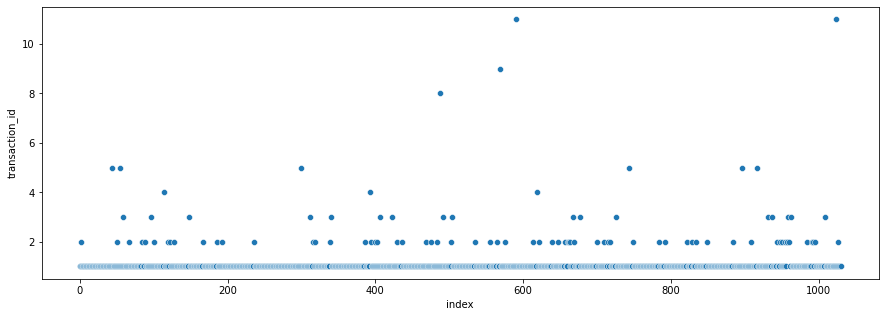

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=visitor_agg, x='index', y='transaction_id');

* findings:
    1. Jumlah pesanan per pengguna kebanyakan dibawah 2 pesanan, atau biasanya pengguna hanya melakukan sekali pemesanan
    2. Kebanyakan Terdapat outliers pada data, karena kebanyakan pengguna melakukan pemesanan dibawah dua kali pemesanan, jarang-jarang ada orang yang melakukan pemesanan diatas dua kali

### Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [47]:
# cek presentil
np.percentile(visitor_agg['transaction_id'], [95, 99])

array([2., 4.])

In [48]:
visitor_agg['transaction_id'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: transaction_id, dtype: float64

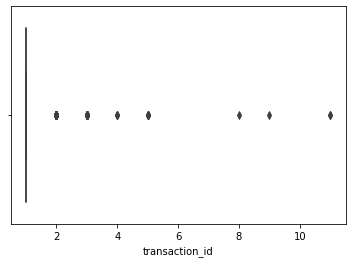

In [90]:
# cek grafiknya
sns.boxplot(visitor_agg['transaction_id']);

* findings
    1. Karena nilai persentil nya adalah 2, maka jika ada jumlah pemesanan diatas 2 kali itu sudah termasuk outlier

### Buat diagram tebar (scatter chart) untuk harga pesanan. Buat kesimpulan dan asumsinya.

In [50]:
# cek datanya
df_orders = df_orders.reset_index()
df_orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


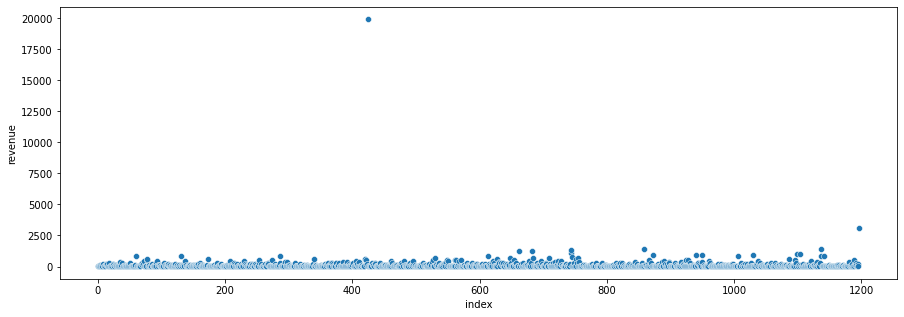

In [51]:
# x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df_orders, x='index', y='revenue');

* findings :
    * Data kebanyakan dibawah 2500, diats itu merupakan outlier, maka dari itu harus difilter terlebih dahulu

In [52]:
df_orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

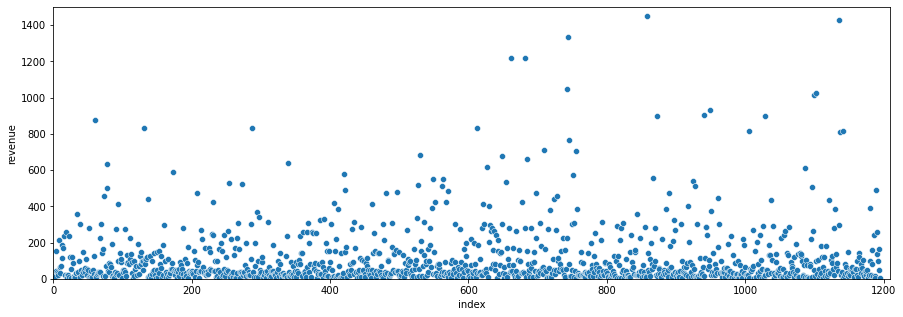

In [92]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df_orders, x='index', y='revenue');
plt.axis([0, 1210, 0, 1500]);

* findings :
    1. Harga pesanan tersebar dari harga 0 hingga 1400 dolar
    2. Harga pesanan kebanyakan di harga 0 hingga 200 dolar, diatas 200 dolar juga ada banyak tapi tidak sebanyak dibawah 200 dolar

### Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali.

In [54]:
np.percentile(df_orders['revenue'], [50, 75, 95, 99])

array([ 50.2  , 130.4  , 435.54 , 900.904])

In [55]:
df_orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

* findings:
    1. Harga pesanan pada persentil ke 95 adalah sekitar 400an dollar
    2. Harga pesanan pada persentil ke 99 adalah sekitar 900an dollar

### Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.

In [56]:
# cek datanya
df_orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


In [57]:
orders_a = df_orders[df_orders['group']=='A'].groupby('visitor_id').agg({
    'transaction_id': 'nunique'
}).reset_index()

orders_b = df_orders[df_orders['group']=='B'].groupby('visitor_id').agg({
    'transaction_id': 'nunique'
}).reset_index()

In [58]:
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [59]:
orders_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [60]:
orders_b

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [61]:
#visits
len(orders_a['transaction_id'])

503

In [62]:
# total kunjungan
df_visits[df_visits['group']=='A']['visits'].sum()

18736

In [63]:
# total pengguna yang tidak melakukan pembelian
18736 - 503

18233

In [64]:
df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_a['transaction_id'])

18233

In [65]:
sample_a = pd.concat([orders_a['transaction_id'],
                      pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_a['transaction_id'])),
                                name='orders')], 
                     axis=0)
sample_b = pd.concat([orders_a['transaction_id'],
                      pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_a['transaction_id'])),
                                name='orders')], 
                     axis=0)

In [66]:
# cek datanya
sample_a

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Length: 18736, dtype: int64

In [67]:
# urutkan datanya dari yang terbesar
sample_a.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
dtype: int64

In [68]:
len(sample_a), len(sample_b)

(18736, 18916)

In [69]:
# H0 adalah data A dan B secara statistik SAMA
# H1 adalah data A dan B secara statistik BERBEDA

alpha = 0.05 # significance level

results = stats.mannwhitneyu(sample_a, sample_b)
print('p_value: ', results.pvalue)

if(results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik data A dan B")
else:
    print("Gagal menolak hipoteses nol: kita tidak bisa menyimpulkan perbedaannya")

p_value:  0.8778530458242377
Gagal menolak hipoteses nol: kita tidak bisa menyimpulkan perbedaannya


* findings:
    * Pada grup A terdapat 18233 pengguna yang hanya melakukan kunjungan dan tidak melakukan pembelian
    * Karena Pvalue lebih besar dari alpha, maka kita gagal menolak hiptesis nol dan kita tidak bisa menyimpulkan perbedaannya

### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. Buat kesimpulan dan asumsinya.

In [70]:
# cek datanya
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [71]:
df_orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


In [72]:
# pisahkan grup A dan B dan cari revenue nya
sample_a = df_orders[df_orders['group']=='A']['revenue']
sample_b = df_orders[df_orders['group']=='B']['revenue']

In [93]:
# jumlah transaksi A = 100
# jumlah transaksi B = 150
# berbeda dari sisi jumlah transaksi

In [94]:
# revenue A 1000 ---> 1000/100 ---> 10/transaksi
# revenue A 
1000/100

10.0

In [95]:
# revenue B 1100 ---> 1100/150 ---> 7.3/transaksi
# revenue B 
1100/150

7.333333333333333

In [96]:
#significance level
alpha = 0.05 

results = stats.mannwhitneyu(sample_a, sample_b)
print('p-value:', results.pvalue)


if(results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangatlah signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value: 0.46723755933450384
Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya


* findings : 
    * Karena p-value lebih besar dari alpha, maka kita gagal menolak hiptesis nol dan kita tidak bisa menyimpulkan perbedaannya, tidak ada perbedaan yang signifikan

### Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

In [75]:
# cek datanya
orders_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [76]:
df_orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...,...
1192,1192,2662137336,3733762160,2019-08-14,100.8,B
1193,1193,2203539145,370388673,2019-08-14,50.1,A
1194,1194,1807773912,573423106,2019-08-14,165.3,A
1195,1195,1947021204,1614305549,2019-08-14,5.5,A


In [79]:
users_with_many_orders = pd.concat([orders_a[orders_a['transaction_id'] > 2]['visitor_id'],
                                   orders_b[orders_b['transaction_id'] > 2]['visitor_id']], axis = 0)
 
users_with_expensive_orders = df_orders[df_orders['revenue'] > 430]['visitor_id']

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()

In [80]:
users_with_many_orders

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
284    2038680547
326    2378935119
340    2458001652
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitor_id, dtype: int64

In [81]:
users_with_expensive_orders

60      4256040402
73      2947100995
77       787824685
78      3288820196
131     2254586615
           ...    
1136    1307669133
1137     759473111
1142    2606908679
1189     393266494
1196    2108080724
Name: visitor_id, Length: 61, dtype: int64

In [82]:
abnormal_users

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, Length: 75, dtype: int64

In [83]:
# cari jumlah total abnormal user
len(abnormal_users)

75

In [86]:
sample_a = pd.concat([orders_a[~(orders_a['visitor_id'].isin(abnormal_users))]['transaction_id'], 
                      pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()  
                                                   - len(orders_a['transaction_id'])),
                                name='orders')], axis=0)

sample_b = pd.concat([orders_b[~(orders_b['visitor_id'].isin(abnormal_users))]['transaction_id'], 
                      pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() 
                                                   - len(orders_b['transaction_id'])),
                                name='orders')], axis=0)

In [87]:
#significance level
alpha = 0.05 

results = stats.mannwhitneyu(sample_a, sample_b)
print('p-value:', results.pvalue)


if(results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangatlah signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value: 0.01417823754717904
Hipotesis nol ditolak: perbedaannya secara statistik sangatlah signifikan


* findings : 
    * Setelah data di filter, dapat di simpulkan Karena p-value lebih kecil dari alpha, maka kita menolak hiptesis nol dan perbedaannya secara statistik sangat signifikan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. Buat kesimpulan dan asumsinya.

In [88]:
sample_a = df_orders[(df_orders['group']=='A') & ~(orders_a['visitor_id'].isin(abnormal_users))]['revenue']
sample_b = df_orders[(df_orders['group']=='B') & (orders_b['visitor_id'].isin(abnormal_users))]['revenue']

In [89]:
#significance level
alpha = 0.05 

results = stats.mannwhitneyu(sample_a, sample_b)
print('p-value:', results.pvalue)


if(results.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik sangatlah signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya")

p-value: 0.46723755933450384
Gagal menolak hipotesis nol: kita tidak bisa menyimpulkan perbedaannya


* findings:
    * Karena p-value lebih besar dari alpha, maka kita gagal menolak hiptesis nol dan kita tidak bisa menyimpulkan perbedaannya, tidak ada perbedaan yang signifikan

## Kesimpulan Umum
Buatlah keputusan berdasarkan hasil pengujian. Keputusan yang memungkinkan adalah: 
1. Menghentikan pengujian, serta mempertimbangkan salah satu kelompok sebagai pemimpin. 
2. Menghentikan pengujian, serta menyimpulkan bahwa tidak ada perbedaan antara kedua kelompok. 
3. Melanjutkan pengujian.

**Kesimpulan Umum**
 * Berdasarkan Hasil pengujian A/B Testing diatas kami memutusan bahwa kita harus menghentikan pengujian, karena dapat disimpulkan bahwa tidak ada perbedaan antara kedua kelompok